# STEP 1 Creation of the “price_label” and “busiest_day” columns.

### Import Libraries and dataframes

In [3]:
import pandas as pd
import numpy as np
import os

In [5]:
ords_prods_merge = pd.read_pickle(r'C:\Users\PC\Documents\Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_merge_final.pkl')

### Subset creation

In [7]:
df = ords_prods_merge[:1000000]

### If condition

In [9]:
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

### Dataframe creation

In [11]:
df['price_range'] = df.apply(price_label, axis=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_12624\2848743372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


### Checking values in new column

In [13]:
df['price_range'].value_counts(dropna = False)

price_range
Mid-range product    672525
Low-range product    314109
High range            12413
Not enough data         953
Name: count, dtype: int64

### Defining max value

In [15]:
df['prices'].max()

99999.0

### Loc Code

In [23]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [19]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [21]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [25]:
df['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     672525
Low-range product     314109
High-range product     12413
NaN                      953
Name: count, dtype: int64

### Loc Code on the entire dataframe

In [27]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [29]:
ords_prods_merge.loc[(ords_prods_merge['prices'] <= 15) & (ords_prods_merge['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [31]:
ords_prods_merge.loc[ords_prods_merge['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [33]:
ords_prods_merge['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
NaN                      30200
Name: count, dtype: int64

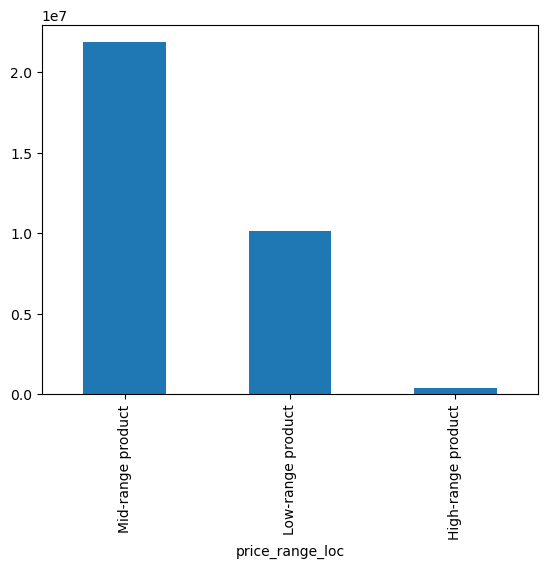

In [35]:
Range_Price_bar = ords_prods_merge['price_range_loc'].value_counts().plot.bar()

### Exporting Bar Chart

In [38]:
Range_Price_bar.figure.savefig(r'C:\Users\PC\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\Range_Price_bar.png')

### Days of the week orders

In [48]:
ords_prods_merge['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    6209808
1    5665951
6    4500391
2    4217868
5    4209603
3    3844175
4    3787263
Name: count, dtype: int64

### For - Loop

In [51]:
result = []

for value in ords_prods_merge["orders_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

### Column Creation

In [56]:
ords_prods_merge['busiest_day'] = result

In [58]:
ords_prods_merge['busiest_day'].value_counts(dropna = False)

busiest_day
Regularly busy    22437988
Busiest day        6209808
Least busy         3787263
Name: count, dtype: int64

# STEP 2 Creation of "Busiest days" and "Slowest days" columns 

In [67]:
result1 = []

for value in ords_prods_merge["orders_day_of_week"]:
  if value in [0, 1]:
    result1.append("Busiest days")
  elif value in [4, 3]:
    result1.append("Slowest days")
  else:
    result1.append("Regularly busy")

In [69]:
ords_prods_merge['busiest_days'] = result1

# STEP 3 Check the values of this new column for accuracy. Note any observations in markdown format.

In [71]:
ords_prods_merge['busiest_days'].value_counts(dropna = False)

busiest_days
Regularly busy    12927862
Busiest days      11875759
Slowest days       7631438
Name: count, dtype: int64

#### Busiest days increased from 6209808 to 11875759.
#### Slowest days increased from 3787263 to 7631438.
#### Regularly busy decreased from 22437988 to 12927862.

# STEP 4 When too many users make Instacart orders at the same time, the app freezes. The senior technical officer at Instacart wants you to identify the busiest hours of the day. Rather than by hour, they want periods of time labeled “Most orders,” “Average orders,” and “Fewest orders.” Create a new column containing these labels called “busiest_period_of_day.”

#### Checking variables

In [77]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,Placing_orders_time,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,merge_flag,price_range_loc,busiest_day,busiest_days
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77.0,7.0,9.0,both,Mid-range product,Regularly busy,Regularly busy
1,2539329,1,1,2,8,NaN,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,both,Mid-range product,Regularly busy,Regularly busy
2,2539329,1,1,2,8,NaN,12427,3,0,both,Original Beef Jerky,23.0,19.0,4.4,both,Low-range product,Regularly busy,Regularly busy
3,2539329,1,1,2,8,NaN,26088,4,0,both,Aged White Cheddar Popcorn,23.0,19.0,4.7,both,Low-range product,Regularly busy,Regularly busy
4,2539329,1,1,2,8,NaN,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,both,Low-range product,Regularly busy,Regularly busy


#### Identifying the busiest hours of the days

In [79]:
ords_prods_merge['Placing_orders_time'].value_counts(dropna = False)

Placing_orders_time
10    2764476
11    2738647
14    2691598
15    2664583
13    2663346
12    2620898
16    2537506
9     2456751
17    2089510
8     1719991
18    1637956
19    1259416
20     977049
7      891951
21     796379
22     634743
23     402621
6      290796
0      218951
1      115787
5       88064
2       69435
4       53284
3       51321
Name: count, dtype: int64

#### Creation of the new variable

In [81]:
result2 = []

for value in ords_prods_merge["Placing_orders_time"]:
  if value in [10, 11, 14, 15, 13, 12, 16, 9]:
    result2.append("Most orders")
  elif value in [17, 8, 18, 19, 20, 7, 21, 22]:
    result2.append("Average orders")
  else:
    result2.append("Fewest orders")

#### Name assignation to the new variable

In [83]:
ords_prods_merge['busiest_period_of_day'] = result2

# STEP 5 Printing frequency

In [85]:
ords_prods_merge['busiest_period_of_day'].value_counts(dropna = False)

busiest_period_of_day
Most orders       21137805
Average orders    10006995
Fewest orders      1290259
Name: count, dtype: int64

# STEP 7 Export your dataframe as a pickle file (since you added new columns) and store it correctly in your “Prepared Data” folder.

In [96]:
ords_prods_merge.to_pickle(r'C:\Users\PC\Documents\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_4.7.pkl')